In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### With solve (OLD)

In [2]:
from neurodiffeq import diff
from neurodiffeq.ode import solve
from neurodiffeq.conditions import IVP

In [3]:
pop_eq = lambda u, t: diff(u, t) - 0.1*u*(1-u)
initial_vals = IVP(t_0 = 0, u_0 = 0.9)


#solving my ODE

solution_fun, loss_stats = solve(
ode = pop_eq, condition = initial_vals, t_min = 0.0, t_max = 100.0)

C:\Users\arazs\.conda\envs\tensorenviron\lib\site-packages\neurodiffeq\ode.py:262: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  FutureWarning,


<IPython.core.display.Javascript object>


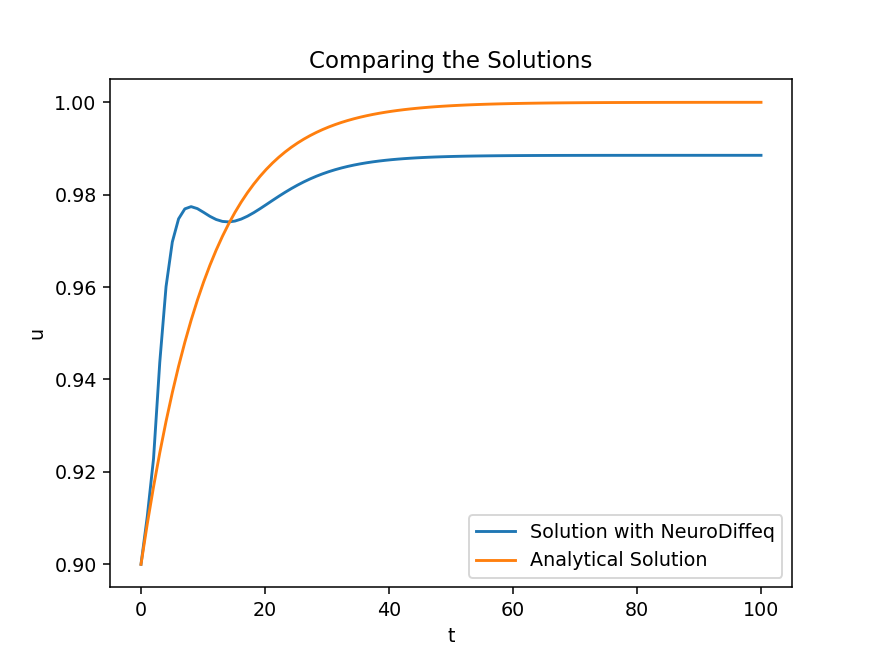

In [4]:
#Testing Solved function with analytical equivalent function

ts = np.linspace(0, 100.0, 100)
u_neuro = solution_fun(ts, to_numpy = True)
u_ana = 1/(1 + np.exp(-(0.1*ts + np.log(9))))

plt.figure()
plt.plot(ts, u_neuro, label = 'Solution with NeuroDiffeq')
plt.plot(ts, u_ana, label = 'Analytical Solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Comparing the Solutions')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


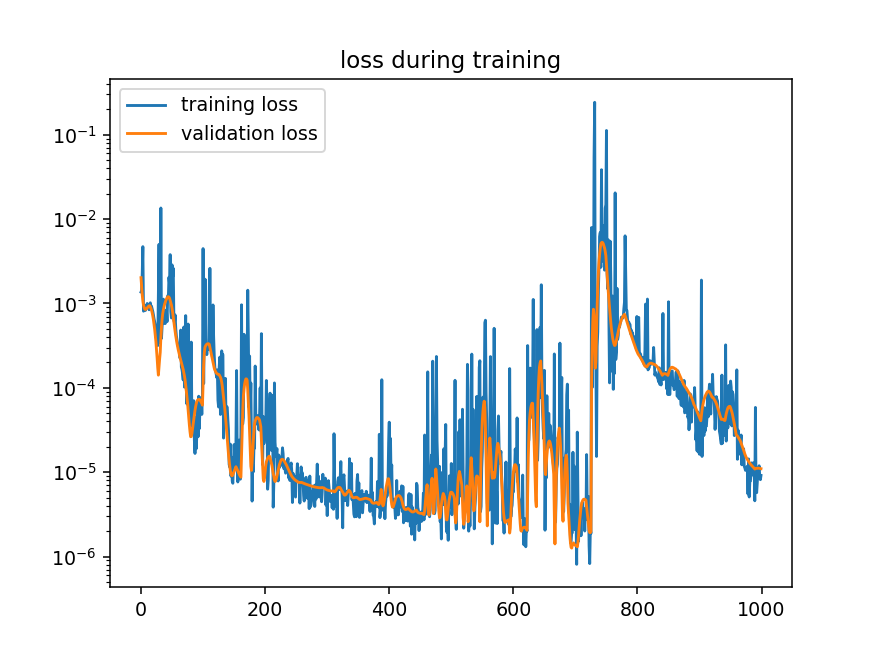

In [5]:
plt.figure()
plt.plot(loss_stats['train_loss'], label='training loss')
plt.plot(loss_stats['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

### With 1-D Solver (NEW)


In [6]:
from neurodiffeq.solvers import Solver1D
from neurodiffeq.callbacks import MonitorCallback

### t_0 = 0 and u_0 = 0.9

In [7]:
pop_eq = lambda u, t: [diff(u, t) - 0.1*u*(1-u)]
initial_vals = [IVP(t_0 = 0, u_0 = 0.9)]

solver = Solver1D(
ode_system = pop_eq, conditions = initial_vals, t_min = -0, t_max = 10.0)

In [8]:
solver.fit(max_epochs = 1000)

In [9]:
sol_1d = solver.get_solution()

<IPython.core.display.Javascript object>


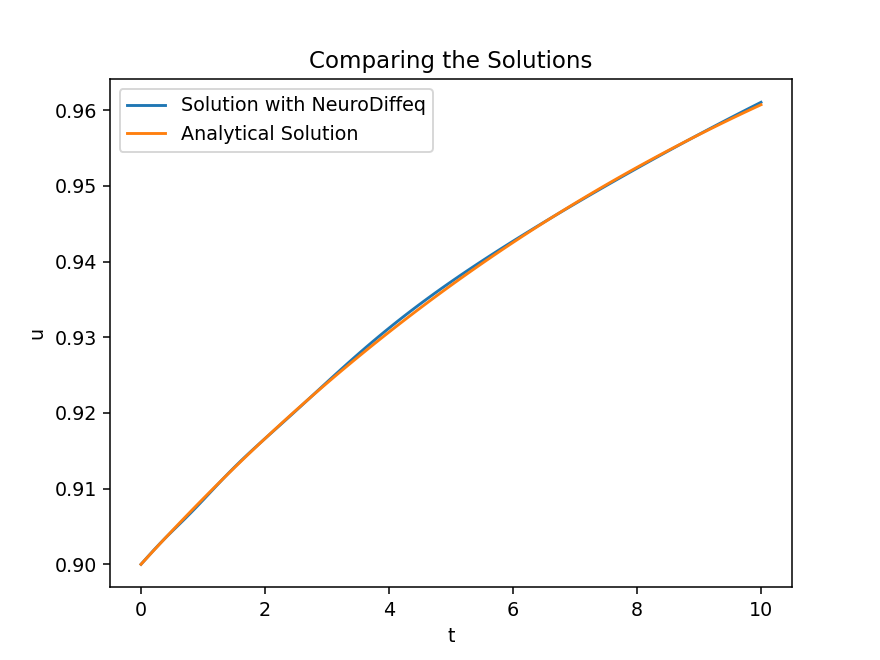

In [10]:
ts = np.linspace(0, 10.0, 100)
u_neuro = sol_1d(ts, to_numpy = True)
u_ana = 1/(1 + np.exp(-(0.1*ts + np.log(9))))

plt.figure()
plt.plot(ts, u_neuro, label = 'Solution with NeuroDiffeq')
plt.plot(ts, u_ana, label = 'Analytical Solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Comparing the Solutions')
plt.legend()
plt.show()

### t_0 = 0 and u_0 = 0.8

In [11]:
pop_eq = lambda u, t: [diff(u, t) - 0.1*u*(1-u)]
initial_vals = [IVP(t_0 = 0, u_0 = 0.8)]

solver = Solver1D(
ode_system = pop_eq, conditions = initial_vals, t_min = -0, t_max = 10.0)

In [12]:
solver.fit(max_epochs = 1000)

In [13]:
sol_1d = solver.get_solution()

<IPython.core.display.Javascript object>


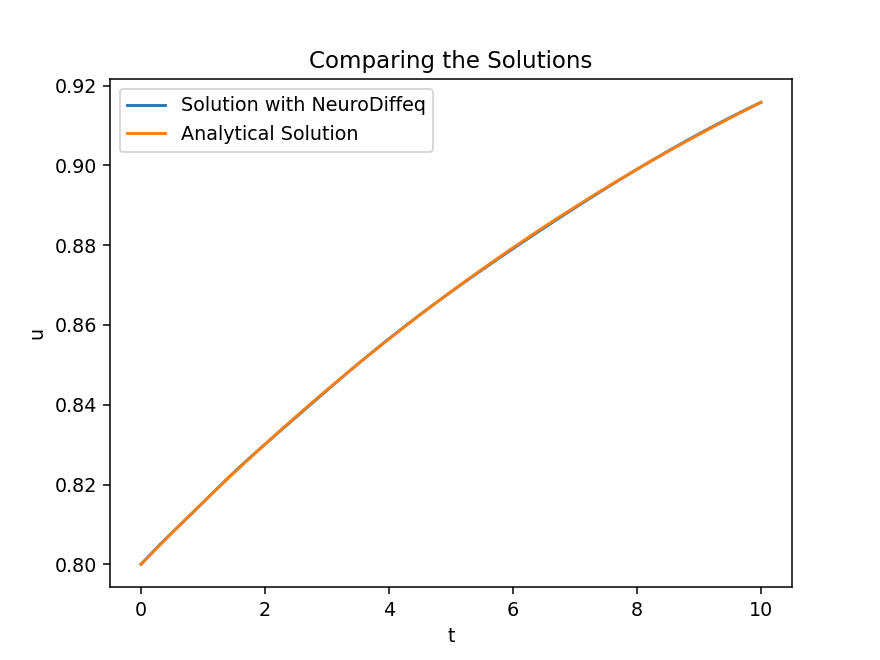

In [14]:
ts = np.linspace(0, 10.0, 100)
u_neuro = sol_1d(ts, to_numpy = True)
u_ana = 1/(1 + np.exp(-(0.1*ts + np.log(4))))

plt.figure()
plt.plot(ts, u_neuro, label = 'Solution with NeuroDiffeq')
plt.plot(ts, u_ana, label = 'Analytical Solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('Comparing the Solutions')
plt.legend()
plt.show()

### Trying to save Pytorch Model

In [18]:
solver.get_internals()

{'metrics': {},
 'n_batches': {'train': 1, 'valid': 4},
 'best_nets': [FCNN(
    (NN): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=1, bias=True)
    )
  )],
 'criterion': <function neurodiffeq.solvers.BaseSolver.__init__.<locals>.<lambda>(r)>,
 'conditions': [<neurodiffeq.conditions.IVP at 0x1c195bdccc8>],
 'global_epoch': 1000,
 'lowest_loss': 4.802509823238725e-08,
 'n_funcs': 1,
 'nets': [FCNN(
    (NN): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=1, bias=True)
    )
  )],
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.001
     weight_decay: 0
 ),
 'diff_eqs': <function __main_

In [22]:
import torch
torch.save(solver.nets, 'test_model')

In [23]:
torch.load('test_model')

[FCNN(
   (NN): Sequential(
     (0): Linear(in_features=1, out_features=32, bias=True)
     (1): Tanh()
     (2): Linear(in_features=32, out_features=32, bias=True)
     (3): Tanh()
     (4): Linear(in_features=32, out_features=1, bias=True)
   )
 )]